In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 

In [7]:
data=pd.read_csv("ec2_cpu_utilization_c6585a.csv")

In [9]:
data

,timestamp,value
0,2014-04-02 14:29:00,0.066
1,2014-04-02 14:34:00,0.066
2,2014-04-02 14:39:00,0.068
3,2014-04-02 14:44:00,0.134
4,2014-04-02 14:49:00,0.066
...,...,...
4027,2014-04-16 14:04:00,0.066
4028,2014-04-16 14:09:00,0.068
4029,2014-04-16 14:14:00,0.134
4030,2014-04-16 14:19:00,0.068


In [11]:
# Basic check

In [13]:
data.head()#first five rows

,timestamp,value
0,2014-04-02 14:29:00,0.066
1,2014-04-02 14:34:00,0.066
2,2014-04-02 14:39:00,0.068
3,2014-04-02 14:44:00,0.134
4,2014-04-02 14:49:00,0.066


In [15]:
data.tail() #last five rows

,timestamp,value
4027,2014-04-16 14:04:00,0.066
4028,2014-04-16 14:09:00,0.068
4029,2014-04-16 14:14:00,0.134
4030,2014-04-16 14:19:00,0.068
4031,2014-04-16 14:24:00,0.068


In [17]:
data.sample(5) #random data used

,timestamp,value
1195,2014-04-06 18:04:00,0.068
3625,2014-04-15 04:34:00,0.066
3775,2014-04-15 17:04:00,0.068
210,2014-04-03 07:59:00,0.132
2534,2014-04-11 09:39:00,0.068


In [19]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [21]:
data.describe()
#here we get min ,max ,mean value

,value
count,4032.000000
mean,0.086948
std,0.085212
min,0.062000
25%,0.066000
50%,0.066000
75%,0.068000
max,1.602000


In [23]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

In [25]:
data=pd.read_csv('ec2_cpu_utilization_c6585a.csv',parse_dates=[0],index_col='timestamp')

In [27]:
# EDA

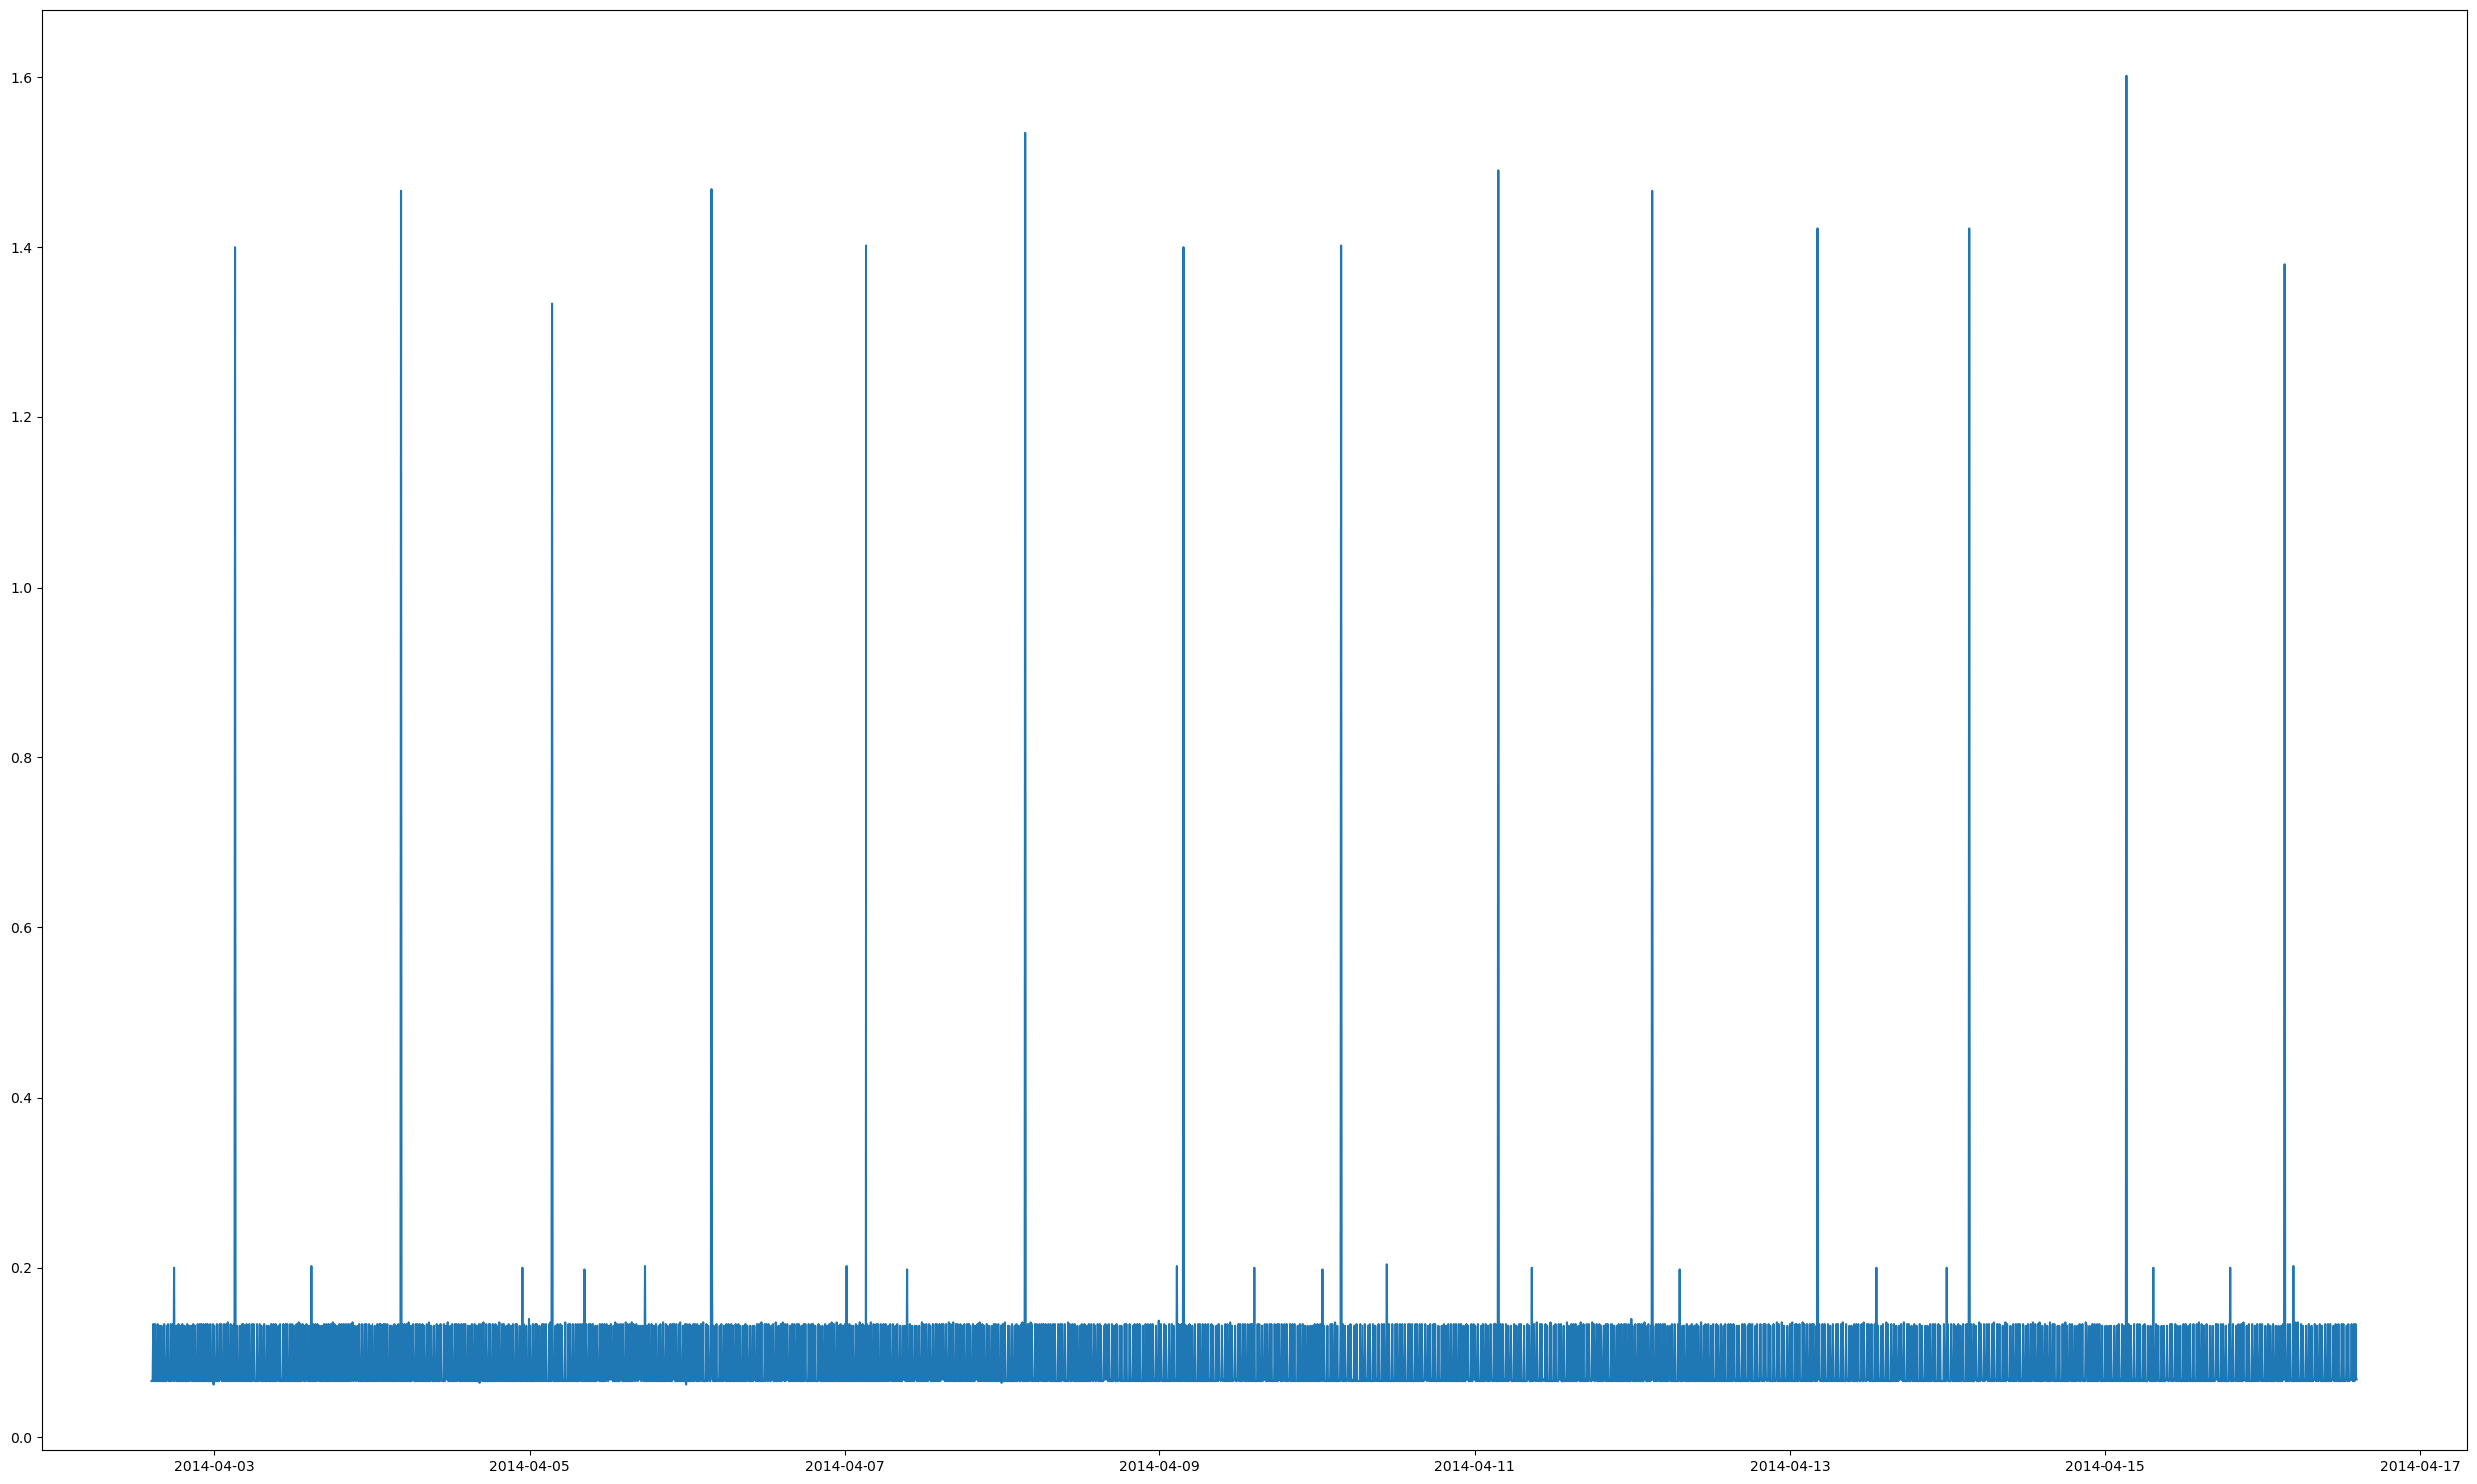

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

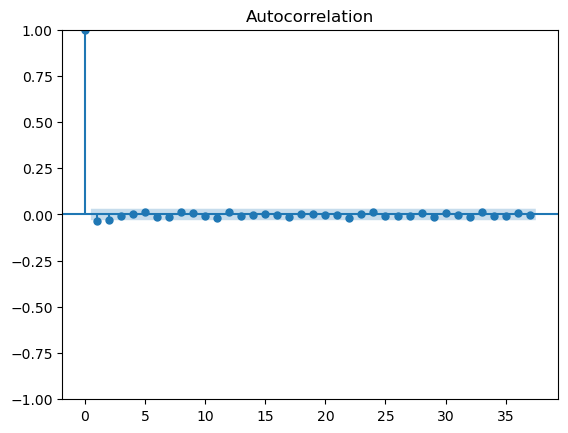

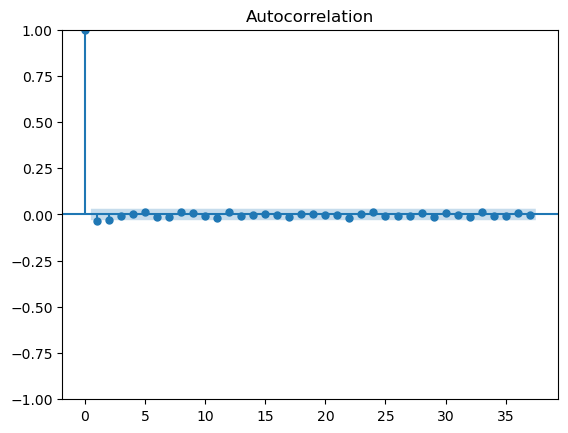

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [33]:
#From the autocorrelation plot, it is clear that given series is not stationary.

In [35]:
#We can perform the ADfuller test, a test based on hypothesis, where if the p-value is
#less than 0.05, then we can consider the time series is stationary, and if the P-value is
#greater than 0.05, then the time series is non-stationary.

In [37]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -47.09936870158173
2. P-Value :  0.0
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4030
5. Critical Values :
	 1% :  -3.431973689863888
	 5% :  -2.862257457341372
	 10% :  -2.5671519099310998


In [39]:
#P-value is higher for our dataset, and we can say that the evidence of rejecting the null
#hypothesis is low; hence the time series is non-stationary.

In [41]:
data

,value
timestamp,
2014-04-02 14:29:00,0.066
2014-04-02 14:34:00,0.066
2014-04-02 14:39:00,0.068
2014-04-02 14:44:00,0.134
2014-04-02 14:49:00,0.066
...,...
2014-04-16 14:04:00,0.066
2014-04-16 14:09:00,0.068
2014-04-16 14:14:00,0.134


In [43]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [45]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-04-02 14:29:00,NaN
2014-04-02 14:34:00,0.000
2014-04-02 14:39:00,0.002
2014-04-02 14:44:00,0.066
2014-04-02 14:49:00,-0.068
...,...
2014-04-16 14:04:00,-0.068
2014-04-16 14:09:00,0.002
2014-04-16 14:14:00,0.066


In [47]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [49]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-04-02 14:29:00,NaN
2014-04-02 14:34:00,0.000
2014-04-02 14:39:00,0.002
2014-04-02 14:44:00,0.066
2014-04-02 14:49:00,-0.068
...,...
2014-04-16 14:04:00,-0.068
2014-04-16 14:09:00,0.002
2014-04-16 14:14:00,0.066


In [51]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-04-02 14:34:00,0.000
2014-04-02 14:39:00,0.002
2014-04-02 14:44:00,0.066
2014-04-02 14:49:00,-0.068
2014-04-02 14:54:00,0.000
...,...
2014-04-16 14:04:00,-0.068
2014-04-16 14:09:00,0.002
2014-04-16 14:14:00,0.066


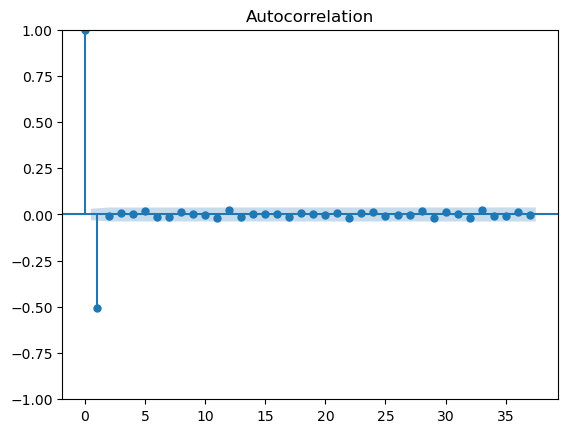

In [53]:
plot_acf(data1); # autocorrelation plot 

In [55]:
data2=data1.diff(periods=1) # differencing applied to data1

In [57]:
data2=data2.iloc[1:] # integrated to the order of 2

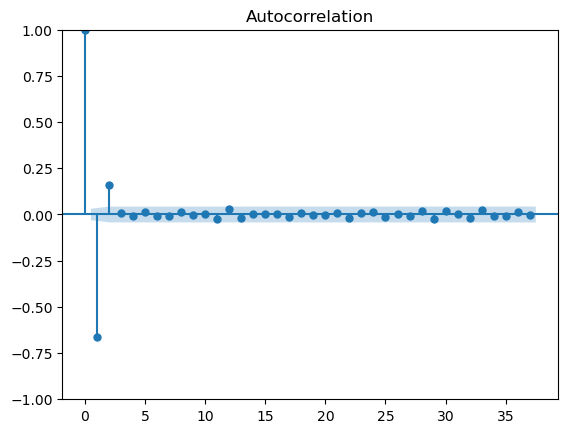

In [59]:
plot_acf(data2);

In [61]:
data2.shape#shape of the data rows and columns

(4030, 1)

In [63]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [65]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3930 entries, 2014-04-02 22:59:00 to 2014-04-16 14:24:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3930 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


In [67]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [69]:

#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [79]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [81]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

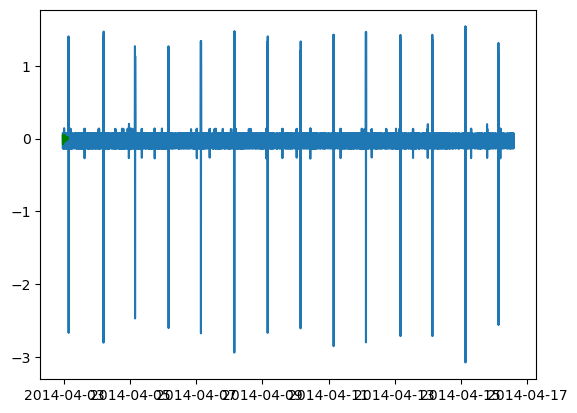

In [83]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [85]:
## ARIMA Model

In [87]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [89]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [91]:
## evaluate the model
print(model_arima_fit.aic)

-157.07095771155426


In [93]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [95]:
prediction

2014-04-02 14:44:00    0.002000
2014-04-02 14:49:00    0.016801
2014-04-02 14:54:00    0.016731
2014-04-02 14:59:00   -0.085776
2014-04-02 15:04:00    0.068000
                         ...   
2014-04-03 02:09:00   -0.021583
2014-04-03 02:14:00   -0.021579
2014-04-03 02:19:00   -0.021582
2014-04-03 02:24:00   -0.021580
2014-04-03 02:29:00   -0.021582
Freq: 5min, Name: predicted_mean, Length: 142, dtype: float64

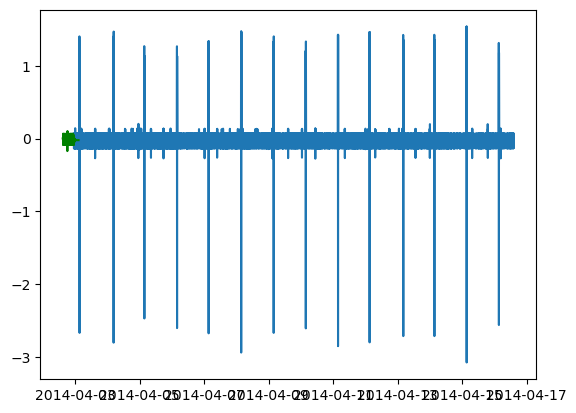

In [97]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [99]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [101]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) -194.3267471714529
(0, 0, 1) -301.050451352055
(0, 0, 2) -387.173112783368
(0, 0, 3) -391.5270331217264
(0, 0, 4) -382.70725157395367
(0, 1, 0) -73.59595779235363
(0, 1, 1) -186.743325232002
(0, 1, 2) -288.1253445343227
(0, 1, 3) -367.87420856287616
(0, 1, 4) -384.98666449104616
(0, 2, 0) 50.867119487533664
(0, 2, 1) -65.24255157849872
(0, 2, 2) -173.31088307346204
(0, 2, 3) -270.25482340582005
(0, 2, 4) -342.4758010016746
(0, 3, 0) 175.32649570454595
(0, 3, 1) 57.947076100031936
(0, 3, 2) -53.220385584288536
(0, 3, 3) -156.8458397499149
(0, 3, 4) -249.11671687733934
(0, 4, 0) 298.9745539195801
(0, 4, 1) 181.1035620275576
(0, 4, 2) 68.66806879168522
(0, 4, 3) -38.03163019560077
(0, 4, 4) -137.25555753075832
(1, 0, 0) -253.8762152093973
(1, 0, 1) -309.35349233820284
(1, 0, 2) -310.6239020647101
(1, 0, 3) -381.14848436314566
(1, 0, 4) -399.744631998547
(1, 1, 0) -157.07095771155426
(1, 1, 1) -244.6437026879717
(1, 1, 2) -320.11573067699373
(1, 1, 3) -374.7173747629509
(1, 1, 4)

In [102]:
min(list2)  # lowest aic score

-399.744631998547

In [103]:
loc=list2.index(min(list2))
loc

29

In [104]:
# pdq corresponding to lowest aic
list1[loc]

(1, 0, 4)

In [109]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [111]:
print(model_arima_fit.aic) # confirm aic score

-365.75596720266606


In [113]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-04-02 22:59:00    0.037295
2014-04-02 23:04:00   -0.038460
2014-04-02 23:09:00   -0.021411
2014-04-02 23:14:00    0.026277
2014-04-02 23:19:00    0.029929
2014-04-02 23:24:00   -0.055453
2014-04-02 23:29:00    0.015891
2014-04-02 23:34:00    0.023493
2014-04-02 23:39:00   -0.011056
Freq: 5min, Name: predicted_mean, dtype: float64

In [115]:
prediction=model_arima_fit.predict(start=1,end=142)

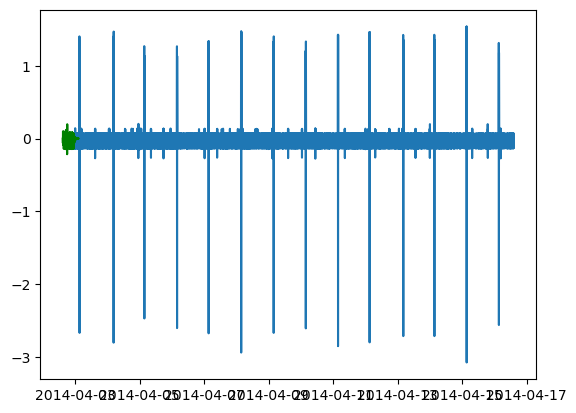

In [119]:
plt.plot(test)
plt.plot(prediction,color='green')

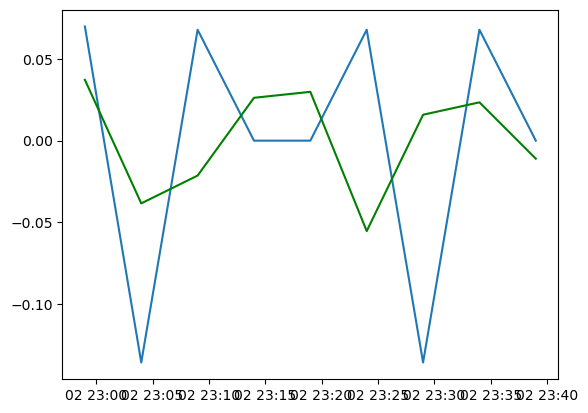

In [121]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [123]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ 0.07 , -0.136,  0.068,  0.   ,  0.   ,  0.068, -0.136,  0.068,
        0.   ,  0.   ,  0.068, -0.14 ,  0.142, -0.136,  0.068, -0.004,
        0.002,  0.068, -0.134,  0.064,  0.002,  0.   ,  0.068, -0.134,
        0.066])

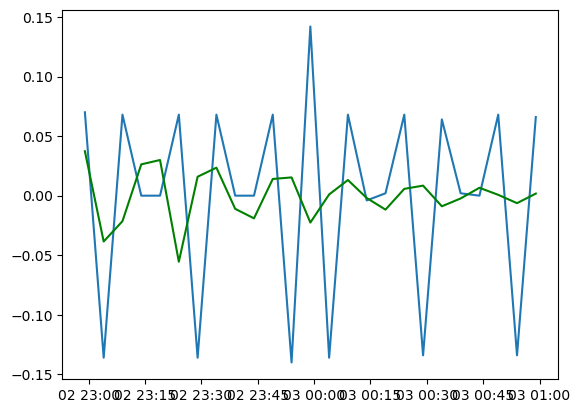

In [125]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [127]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 0.007662059062018166,
 'mae': 0.07020651949473486,
 'rmse': 0.08753318834601061}

In [129]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

0.08753318834601061


0.007662059062018166

# Conclusion